### ANALYSIS OF UNSTRUCTURED DATA TASK 1
## GROUP MEMBERS: Abdallah El Rifaii, Oskar Kulig, Kacper Lukaszewicz

# Information about the data
*This data set contains the grades earned by students in various subjects (the dataset is available here https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams*, *other relevent information about the data would be mention in the analysis* 

### After examinining our dataset we try answer the following interesting question:

1. How does parental education level correlate with student performance?
2. How does student performance differ between males and females?
3. What is the average performance in maths of students across all subjects?
4. Which racial group has the highest average performance?
5. Is there a correlation between high performance in math and high performance in other subjects?
6. Does participation in a preparation course have an impact on average scores?

In [ ]:
# Useful Libraries for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

In [ ]:
#reading/loading our dataset
ds = pd.read_csv("exams.csv")
ds.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
ds.shape

(1000, 8)

In [ ]:
#checking missing values(result shows that there are no missing values)
ds.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
ds.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
# Check the type of data in the set

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# additing data with mumerical values eg math score, reading score and writing score
from statistics import mean


ds['avg'] = (ds['math score']+ ds['reading score']+ ds['writing score'])/3

In [ ]:
ds.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


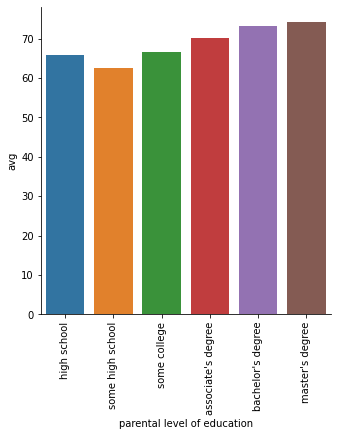

In [ ]:
# do students with high parental level of education perform more?
sns.catplot(data = ds, x= "parental level of education", y= "avg", kind = "bar", ci = None)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#  group of gender performed the most in math, writing, and reading 

ds.groupby("gender")[["math score", "reading score", "writing score"]].mean()



,math score,reading score,writing score
gender,,,
female,63.196687,71.888199,71.708075
male,69.384913,66.305609,64.029014


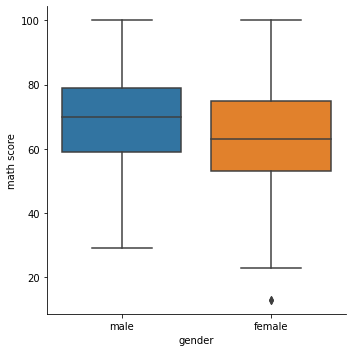

In [ ]:
sns.catplot(data = ds, x= "gender", y = "math score", kind = "box")
plt.show()

In [ ]:
# the overall average of students performance

m = ds["avg"].mean()

m

67.712

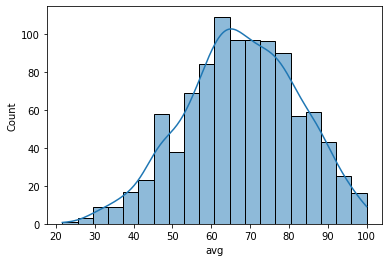

In [ ]:
sns.histplot(data = ds, x= "avg", kde = True)
plt.show()

In [ ]:
# students with final score below average

below_mean = ds[ds["avg"] < m]


In [ ]:
# the gender with high number of students below average.

n = below_mean["gender"].value_counts()
n



male      270
female    236
Name: gender, dtype: int64

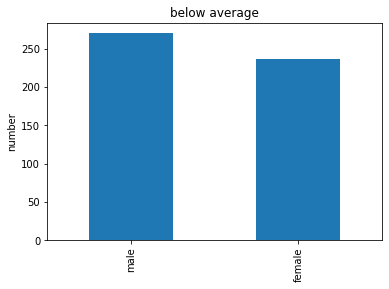

In [ ]:
n.plot(kind = "bar", ylabel = "number", title = "below average")

In [ ]:
#  students with score above average

above_mean = ds[ds["avg"] > m]

In [ ]:
# gender with high number of students above average
a = above_mean["gender"].value_counts()

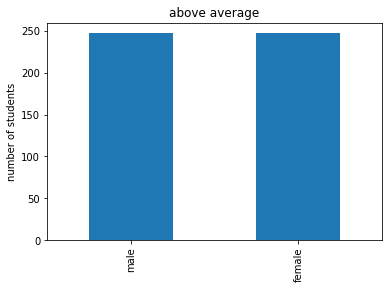

In [ ]:
a.plot(kind = "bar", ylabel = "number of students", title = "above average")

In [ ]:
# the race with high number of bright students
r = above_mean["race/ethnicity"].value_counts()
r

group D    158
group C    135
group B     83
group E     82
group A     36
Name: race/ethnicity, dtype: int64

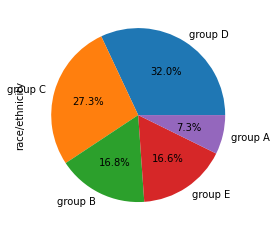

In [ ]:
r.plot(kind = "pie", startangle = 0, autopct = "%1.1f%%")

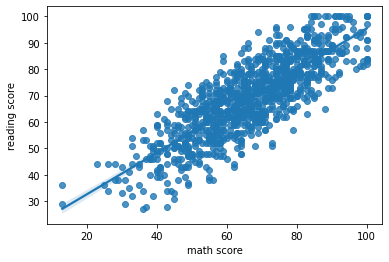

In [ ]:
# does good performance in math imply good performance in other subjects?
# we can check the relationship btn math scores and reading score
sns.regplot(data = ds, x = "math score", y = "reading score")
plt.show()

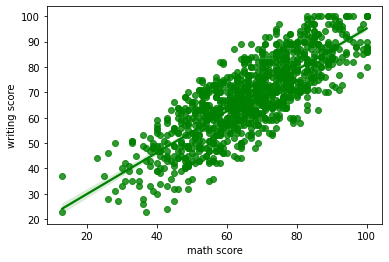

In [ ]:
# we can also check relationship btn math score and writing score.

sns.regplot(data = ds, x = "math score", y = "writing score", color = "g")
plt.show()

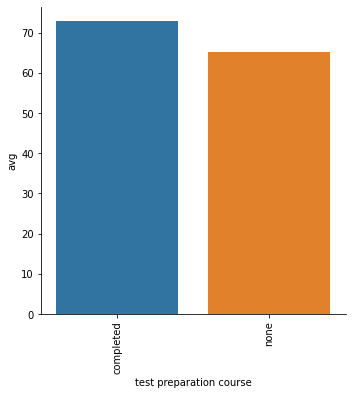

In [ ]:
#Does participation in a preparation course have an impact on average scores?
sns.catplot(data = ds, x= "test preparation course", y= "avg", kind = "bar", ci = None)
plt.xticks(rotation = 90)
plt.show()